In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.api import SimpleExpSmoothing

In [4]:
# Exponetial Smoothing
# produce reliable forecast very quickly
# ES uses weighted averages of past observations to produce the future
# most recent obsrvations, higher weight
# small alpha, more weight given to obeservations from different past
# large alpha, more weight is given to the most recent obeservations

In [6]:
oil = pd.read_csv('oil.csv',parse_dates=True,index_col=0)
oil

,value
index,
1965-01-01,111.009135
1966-01-01,130.828434
1967-01-01,141.287088
1968-01-01,154.227775
1969-01-01,162.740865
1970-01-01,192.166483
1971-01-01,240.799725
1972-01-01,304.217390
1973-01-01,384.004567


In [7]:
oil.index

DatetimeIndex(['1965-01-01', '1966-01-01', '1967-01-01', '1968-01-01',
               '1969-01-01', '1970-01-01', '1971-01-01', '1972-01-01',
               '1973-01-01', '1974-01-01', '1975-01-01', '1976-01-01',
               '1977-01-01', '1978-01-01', '1979-01-01', '1980-01-01',
               '1981-01-01', '1982-01-01', '1983-01-01', '1984-01-01',
               '1985-01-01', '1986-01-01', '1987-01-01', '1988-01-01',
               '1989-01-01', '1990-01-01', '1991-01-01', '1992-01-01',
               '1993-01-01', '1994-01-01', '1995-01-01', '1996-01-01',
               '1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01'],
              dtype='datetime64[ns]', name='index', freq=None)

<Axes: xlabel='index'>

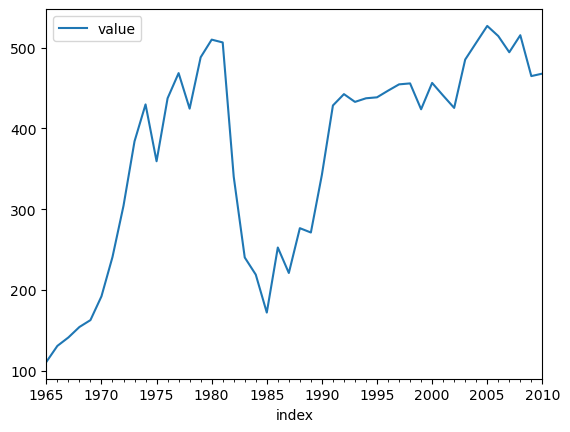

In [8]:
oil.plot()

In [9]:
oil.index.freq = 'YS' # set freq based on how data is reprsented 

In [10]:
# Simple Exponential Smoothing

In [18]:
model1 = SimpleExpSmoothing(oil,initialization_method='estimated')
fit1 = model1.fit(smoothing_level=0.1,optimized=False) # smoothing level is alpha, recent older data weighted more
fcast1 = fit1.forecast(10)
fit1.summary() # better model shows lower stats, like SSE,AIC,BIC

Dep. Variable:,value,No. Observations:,46
Model:,SimpleExpSmoothing,SSE,791259.985
Optimized:,False,AIC,452.626
Trend:,None,BIC,456.283
Seasonal:,None,AICC,453.602
Seasonal Periods:,None,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,11:42:38
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
initial_level,33.630925,l.0,False


In [28]:
model2 = SimpleExpSmoothing(oil,initialization_method='estimated')
fit2 = model2.fit(smoothing_level=0.3,optimized=False) # smoothing level is alpha
fcast2 = fit2.forecast(10)
fit2.summary()

Dep. Variable:,value,No. Observations:,46
Model:,SimpleExpSmoothing,SSE,316107.876
Optimized:,False,AIC,410.419
Trend:,None,BIC,414.076
Seasonal:,None,AICC,411.395
Seasonal Periods:,None,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,11:46:26
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3000000,alpha,False
initial_level,33.630925,l.0,False


In [29]:
model3 = SimpleExpSmoothing(oil,initialization_method='estimated')
fit3 = model3.fit() # smoothing level is alpha
fcast3 = fit3.forecast(10)
fit3.summary()

Dep. Variable:,value,No. Observations:,46
Model:,SimpleExpSmoothing,SSE,109215.807
Optimized:,True,AIC,361.532
Trend:,None,BIC,365.190
Seasonal:,None,AICC,362.508
Seasonal Periods:,None,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,11:46:37
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,111.00913,l.0,True


In [30]:
fcast3

2011-01-01    467.772364
2012-01-01    467.772364
2013-01-01    467.772364
2014-01-01    467.772364
2015-01-01    467.772364
2016-01-01    467.772364
2017-01-01    467.772364
2018-01-01    467.772364
2019-01-01    467.772364
2020-01-01    467.772364
Freq: AS-JAN, dtype: float64

In [31]:
fcast1

2011-01-01    452.418694
2012-01-01    452.418694
2013-01-01    452.418694
2014-01-01    452.418694
2015-01-01    452.418694
2016-01-01    452.418694
2017-01-01    452.418694
2018-01-01    452.418694
2019-01-01    452.418694
2020-01-01    452.418694
Freq: AS-JAN, dtype: float64

In [32]:
fcast2

2011-01-01    483.124718
2012-01-01    483.124718
2013-01-01    483.124718
2014-01-01    483.124718
2015-01-01    483.124718
2016-01-01    483.124718
2017-01-01    483.124718
2018-01-01    483.124718
2019-01-01    483.124718
2020-01-01    483.124718
Freq: AS-JAN, dtype: float64

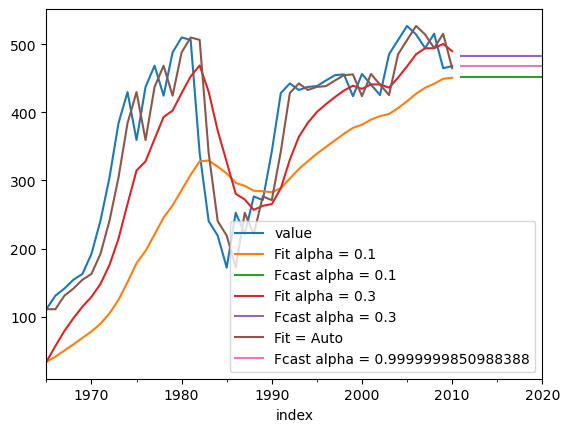

In [33]:
oil.plot(label='Observed')
fit1.fittedvalues.plot(label='Fit alpha = 0.1')
fcast1.plot(label='Fcast alpha = 0.1')
fit2.fittedvalues.plot(label='Fit alpha = 0.3')
fcast2.plot(label='Fcast alpha = 0.3')
fit3.fittedvalues.plot(label='Fit = Auto')
fcast3.plot(label='Fcast alpha = %s' % fit3.model.params['smoothing_level'])
plt.legend()
plt.show()

In [34]:
# exponential smoothing with box-cox transformation

In [51]:
elec = pd.read_csv('elec.csv',parse_dates=True,index_col=0)
elec

,Elec
Month,
1956-01-01,1254
1956-02-01,1290
1956-03-01,1379
1956-04-01,1346
1956-05-01,1535
...,...
1995-04-01,13032
1995-05-01,14268
1995-06-01,14473


<Axes: xlabel='Month'>

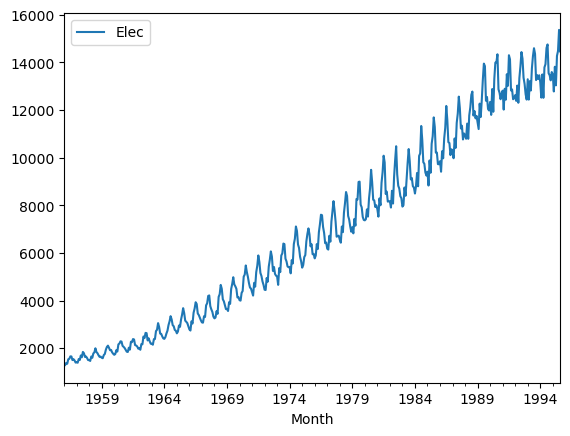

In [52]:
elec.plot()

In [61]:
# Python scipt 6B

In [67]:
# Holt's method
# simple exponential smoothing by allowing forecast to have a trend
# instead of having a straight line at the end, try to capture the trend of the data
# create representation of trend

In [64]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: xlabel='year'>

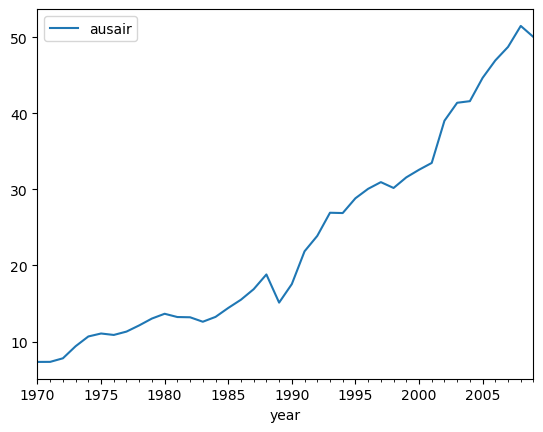

In [66]:
ausair = pd.read_csv('ausair.csv',parse_dates=True,index_col=0)
ausair.plot()

In [71]:
model1 = SimpleExpSmoothing(ausair,initialization_method='estimated')
fit1 = model1.fit()
fcast1 = fit1.forecast(10)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [72]:
fit1.summary()

Dep. Variable:,ausair,No. Observations:,40
Model:,SimpleExpSmoothing,SSE,141.705
Optimized:,True,AIC,54.595
Trend:,None,BIC,57.972
Seasonal:,None,AICC,55.738
Seasonal Periods:,None,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,12:23:44
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
initial_level,7.3186999,l.0,True


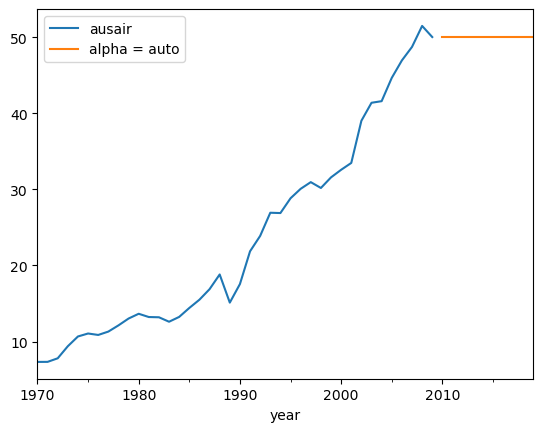

In [75]:
ausair.plot(label='Orginal data')
fcast1.plot(label ='alpha = auto')
plt.legend()
plt.show()

In [76]:
model2 = Holt(ausair,initialization_method='estimated')
fit2 = model2.fit()
fcast2 = fit2.forecast(10)
fit2.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


Dep. Variable:,ausair,No. Observations:,40
Model:,Holt,SSE,94.936
Optimized:,True,AIC,42.573
Trend:,Additive,BIC,49.328
Seasonal:,None,AICC,45.118
Seasonal Periods:,None,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,12:26:22
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.000000,beta,True


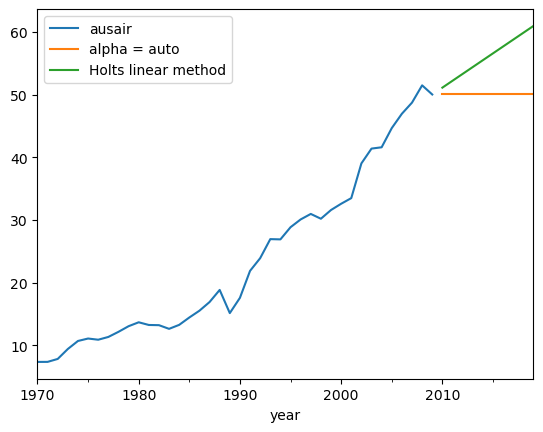

In [77]:
ausair.plot(label='Orginal data')
fcast1.plot(label ='alpha = auto')
fcast2.plot(label='Holts linear method')
plt.legend()
plt.show()

In [81]:
model3 = Holt(ausair,damped_trend=True,initialization_method='estimated')
fit3 = model3.fit()
fcast3 = fit3.forecast(10)
fit3.summary()

Dep. Variable:,ausair,No. Observations:,40
Model:,Holt,SSE,97.801
Optimized:,True,AIC,45.762
Trend:,Additive,BIC,54.207
Seasonal:,None,AICC,49.262
Seasonal Periods:,None,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,12:33:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9999992,alpha,True
smoothing_trend,0.0700062,beta,True


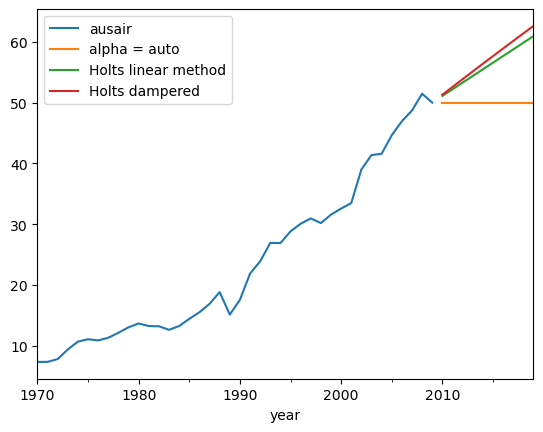

In [82]:
ausair.plot(label='Orginal data')
fcast1.plot(label ='alpha = auto')
fcast2.plot(label='Holts linear method')
fcast3.plot(label='Holts dampered')
plt.legend()
plt.show()

In [83]:
model4 = Holt(ausair,exponential=True,initialization_method='estimated')
fit4 = model4.fit()
fcast4 = fit4.forecast(10)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


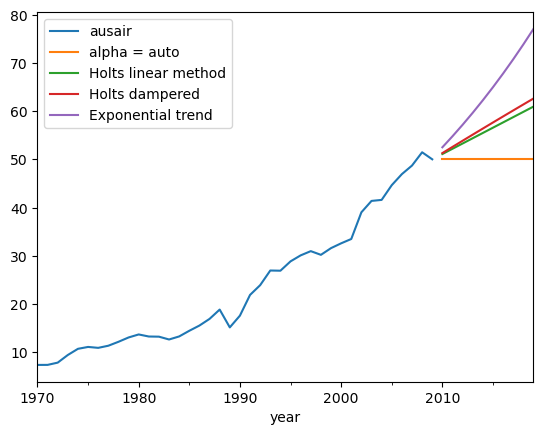

In [84]:
ausair.plot(label='Orginal data')
fcast1.plot(label ='alpha = auto')
fcast2.plot(label='Holts linear method')
fcast3.plot(label='Holts dampered')
fcast4.plot(label='Exponential trend')
plt.legend()
plt.show()

In [85]:
# holt winter methods
# adds seasonlaity to holt method

In [86]:
auscafe = pd.read_csv('auscafe.csv',parse_dates=True,index_col=0)
auscafe

,auscafe
year,
2015-01-31,3.3913
2015-02-28,3.0275
2015-03-31,3.3619
2015-04-30,3.2665
2015-05-31,3.3140
2015-06-30,3.2575
2015-07-31,3.4453
2015-08-31,3.4211
2015-09-30,3.4444


In [88]:
# additive holt winter method
model5 = ExponentialSmoothing(auscafe,trend='additive',seasonal='additive',initialization_method='estimated')
fit5 = model5.fit()
fcast5 = fit5.forecast(20)

In [89]:
fit5.summary()

Dep. Variable:,auscafe,No. Observations:,33
Model:,ExponentialSmoothing,SSE,0.035
Optimized:,True,AIC,-194.012
Trend:,Additive,BIC,-170.068
Seasonal:,Additive,AICC,-145.155
Seasonal Periods:,12,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,12:42:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4031505,alpha,True
smoothing_trend,2.7571e-18,beta,True


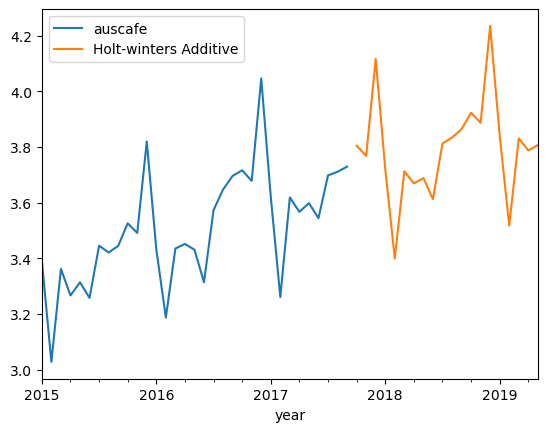

In [90]:
auscafe.plot(label='Original Data')
fcast5.plot(label='Holt-winters Additive')
plt.legend()
plt.show()

In [91]:
# multiplicative
model6 = ExponentialSmoothing(auscafe,trend='multiplicative',seasonal='multiplicative',initialization_method='estimated')
fit6 = model6.fit()
fcast6 = fit6.forecast(20)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [92]:
fit6.summary()

Dep. Variable:,auscafe,No. Observations:,33
Model:,ExponentialSmoothing,SSE,0.033
Optimized:,True,AIC,-195.744
Trend:,Multiplicative,BIC,-171.800
Seasonal:,Multiplicative,AICC,-146.887
Seasonal Periods:,12,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,12:47:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3694943,alpha,True
smoothing_trend,1.138e-18,beta,True


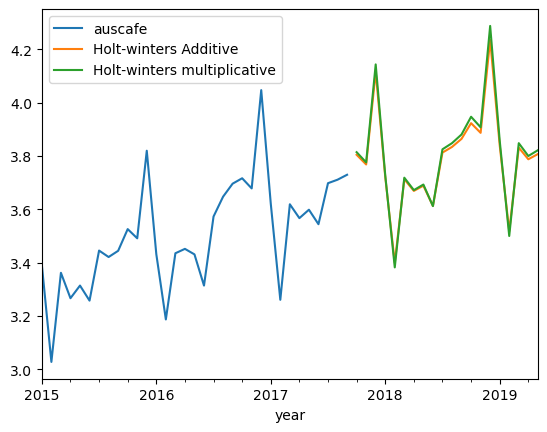

In [93]:
auscafe.plot(label='Original Data')
fcast5.plot(label='Holt-winters Additive')
fcast6.plot(label='Holt-winters multiplicative')
plt.legend()
plt.show()

In [94]:
model7 = ExponentialSmoothing(auscafe,trend='multiplicative',seasonal='additive',initialization_method='estimated')
fit7 = model7.fit()
fcast7 = fit7.forecast(20)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [95]:
fit7.summary()

Dep. Variable:,auscafe,No. Observations:,33
Model:,ExponentialSmoothing,SSE,0.035
Optimized:,True,AIC,-193.949
Trend:,Multiplicative,BIC,-170.005
Seasonal:,Additive,AICC,-145.092
Seasonal Periods:,12,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,12:49:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4042186,alpha,True
smoothing_trend,1.4926e-18,beta,True


In [96]:
model8 = ExponentialSmoothing(auscafe,trend='additive',seasonal='multiplicative',initialization_method='estimated')
fit8 = model8.fit()
fcast8 = fit8.forecast(20)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [97]:
fit8.summary()

Dep. Variable:,auscafe,No. Observations:,33
Model:,ExponentialSmoothing,SSE,0.033
Optimized:,True,AIC,-195.806
Trend:,Additive,BIC,-171.862
Seasonal:,Multiplicative,AICC,-146.949
Seasonal Periods:,12,Date:,"Fri, 07 Jul 2023"
Box-Cox:,False,Time:,12:50:32
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3714055,alpha,True
smoothing_trend,0.000000,beta,True


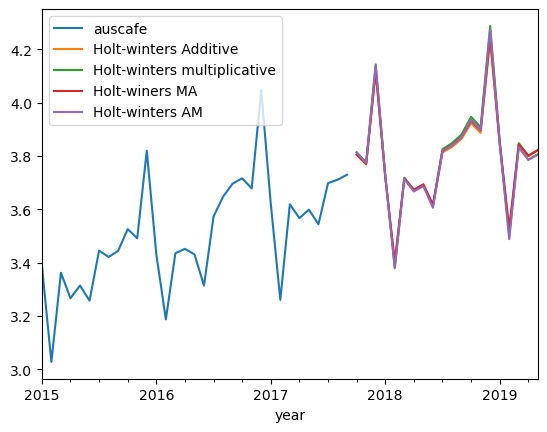

In [98]:
auscafe.plot(label='Original Data')
fcast5.plot(label='Holt-winters Additive')
fcast6.plot(label='Holt-winters multiplicative')
fcast7.plot(label='Holt-winers MA')
fcast8.plot(label='Holt-winters AM')
plt.legend()
plt.show()

In [99]:
# ETS Method
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [100]:
model9 = ETSModel(auscafe['auscafe'],error='additive',initialization_method='estimated')
fit9 = model9.fit()
fcast9 = fit9.forecast(10)
fit9.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                auscafe   No. Observations:                   33
Model:                       ETS(ANN)   Log Likelihood                  10.269
Date:                Fri, 07 Jul 2023   AIC                            -14.539
Time:                        12:56:36   BIC                            -10.049
Sample:                    01-31-2015   HQIC                           -13.028
                         - 09-30-2017   Scale                            0.031
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.3020      0.167      1.804      0.071      -0.026       0.630
initial_level       3.2938      0.130     25.261      0.000       3.038       3.549
===================================================================================
Ljung-Box (Q):                        1.05   Jarque-Bera (JB):                 4.78
Prob(Q):                              0.59   Prob(JB):                         0.09
Heteroskedasticity (H):               2.69   Skew:                            -0.66
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

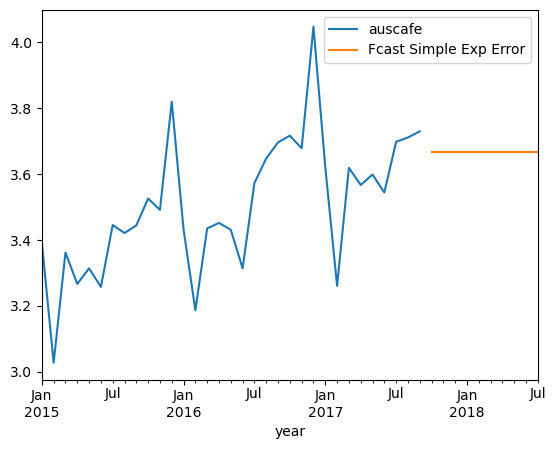

In [101]:
auscafe.plot(label='Original Data')
fcast9.plot(label='Fcast Simple Exp Error')
plt.legend()
plt.show()

In [102]:
model10 = ETSModel(auscafe['auscafe'],error='multiplicative',initialization_method='estimated')
fit10 = model10.fit()
fcast10 = fit10.forecast(10)
fit10.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                auscafe   No. Observations:                   33
Model:                       ETS(MNN)   Log Likelihood                  10.844
Date:                Fri, 07 Jul 2023   AIC                            -15.689
Time:                        12:59:19   BIC                            -11.199
Sample:                    01-31-2015   HQIC                           -14.178
                         - 09-30-2017   Scale                            0.003
Covariance Type:               approx                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.3453      0.168      2.060      0.039       0.017       0.674
initial_level       3.2916      0.125     26.358      0.000       3.047       3.536
===================================================================================
Ljung-Box (Q):                        0.95   Jarque-Bera (JB):                 4.48
Prob(Q):                              0.62   Prob(JB):                         0.11
Heteroskedasticity (H):               2.20   Skew:                            -0.72
Prob(H) (two-sided):                  0.21   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

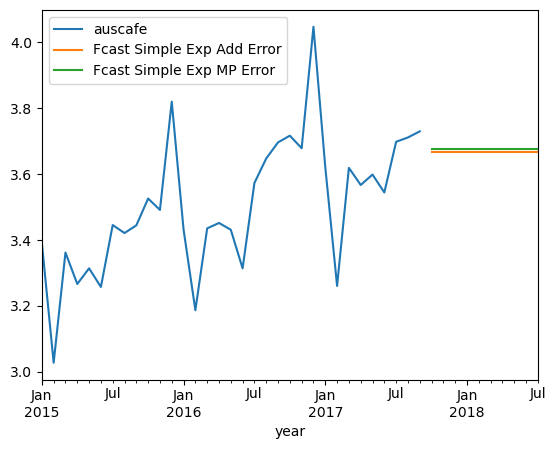

In [103]:
auscafe.plot(label='Original Data')
fcast9.plot(label='Fcast Simple Exp Add Error')
fcast10.plot(label='Fcast Simple Exp MP Error')
plt.legend()
plt.show()

In [104]:
model11 = ETSModel(auscafe['auscafe'],error='multiplicative',seasonal='multiplicative',initialization_method='estimated')
fit11 = model11.fit()
fcast11 = fit11.forecast(10)
fit11.summary()

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                auscafe   No. Observations:                   33
Model:                       ETS(MNM)   Log Likelihood                  62.924
Date:                Fri, 07 Jul 2023   AIC                            -93.849
Time:                        13:01:44   BIC                            -69.905
Sample:                    01-31-2015   HQIC                           -85.792
                         - 09-30-2017   Scale                            0.000
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.7113      0.266      2.673      0.008       0.190       1.233
smoothing_seasonal   2.887e-05      0.519   5.56e-05      1.000      -1.017       1.017
initial_level           3.3799        nan        nan        nan         nan         nan
initial_seasonal.0      1.1172        nan        nan        nan         nan         nan
initial_seasonal.1      1.0215        nan        nan        nan         nan         nan
initial_seasonal.2      1.0353        nan        nan        nan         nan         nan
initial_seasonal.3      1.0234        nan        nan        nan         nan         nan
initial_seasonal.4      1.0172        nan        nan        nan         nan         nan
initial_seasonal.5      1.0134        nan        nan        nan         nan         nan
initial_seasonal.6      0.9584        nan        nan        nan         nan         nan
initial_seasonal.7      0.9821        nan        nan        nan         nan         nan
initial_seasonal.8      0.9786        nan        nan        nan         nan         nan
initial_seasonal.9      0.9933        nan        nan        nan         nan         nan
initial_seasonal.10     0.9055        nan        nan        nan         nan         nan
initial_seasonal.11     1.0000        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (Q):                        1.22   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.98   Prob(JB):                         0.77
Heteroskedasticity (H):               0.54   Skew:                             0.24
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [106]:
model12 = ETSModel(auscafe['auscafe'],error='additive',seasonal='additive',initialization_method='estimated')
fit12 = model11.fit()
fcast12 = fit11.forecast(10)
model13 = ETSModel(auscafe['auscafe'],error='multiplicative',seasonal='additive',initialization_method='estimated')
fit13 = model11.fit()
fcast13 = fit11.forecast(10)
model14 = ETSModel(auscafe['auscafe'],error='additive',seasonal='multiplicative',initialization_method='estimated')
fit14 = model11.fit()
fcast14 = fit11.forecast(10)

C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\reece\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


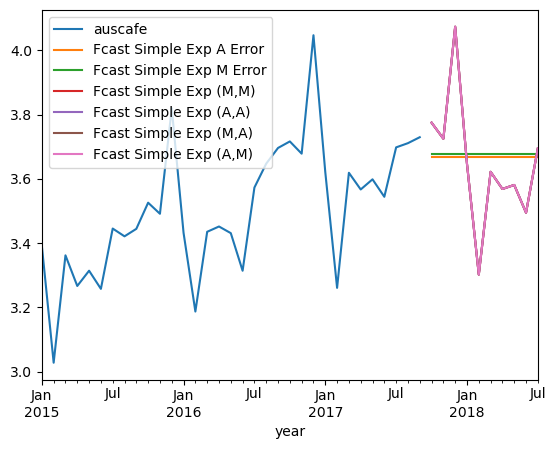

In [107]:
auscafe.plot(label='Original Data')
fcast9.plot(label='Fcast Simple Exp A Error')
fcast10.plot(label='Fcast Simple Exp M Error')
fcast11.plot(label='Fcast Simple Exp (M,M)')
fcast12.plot(label='Fcast Simple Exp (A,A)')
fcast13.plot(label='Fcast Simple Exp (M,A)')
fcast14.plot(label='Fcast Simple Exp (A,M)')
plt.legend()
plt.show()

In [108]:
# Week 06 Coding Excercise 

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv('RSFHFSN (1).csv',parse_dates=True,index_col=0)
df

,RSFHFSN
DATE,
1992-01-01,3846.0
1992-02-01,3908.0
1992-03-01,4157.0
1992-04-01,4141.0
1992-05-01,4275.0
...,...
2023-01-01,10965.0
2023-02-01,10567.0
2023-03-01,12035.0


<Axes: xlabel='DATE'>

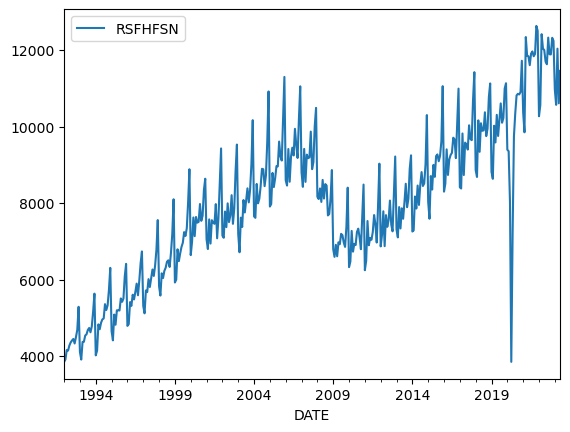

In [111]:
df.plot()

In [112]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [121]:
df.index.freq = 'MS'

In [125]:
model1 = ETSModel(df['RSFHFSN'],error='additive',initialization_method='estimated')
fit1 = model1.fit()
fcast1 = fit1.forecast(12)

In [126]:
model2 = ETSModel(df['RSFHFSN'],error='multiplicative',initialization_method='estimated')
fit2 = model2.fit()
fcast2 = fit2.forecast(12)

In [127]:
model3 = ETSModel(df['RSFHFSN'],error='additive',seasonal='additive',initialization_method='estimated')
fit3 = model3.fit()
fcast3 = fit3.forecast(12)

In [129]:
model4 = ETSModel(df['RSFHFSN'],error='multiplicative',seasonal='multiplicative',initialization_method='estimated')
fit4 = model4.fit()
fcast4 = fit4.forecast(12)

In [130]:
model5 = ETSModel(df['RSFHFSN'],error='multiplicative',seasonal='additive',initialization_method='estimated')
fit5 = model5.fit()
fcast5 = fit5.forecast(12)

In [131]:
model6 = ETSModel(df['RSFHFSN'],error='additive',seasonal='multiplicative',initialization_method='estimated')
fit6 = model6.fit()
fcast6 = fit6.forecast(12)

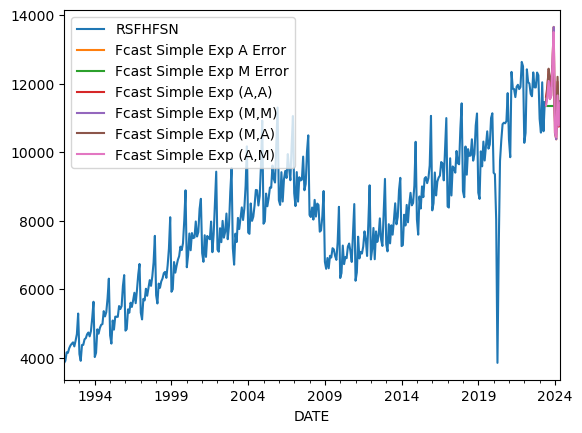

In [132]:
df.plot(label='Original Data')
fcast1.plot(label='Fcast Simple Exp A Error')
fcast2.plot(label='Fcast Simple Exp M Error')
fcast3.plot(label='Fcast Simple Exp (A,A)')
fcast4.plot(label='Fcast Simple Exp (M,M)')
fcast5.plot(label='Fcast Simple Exp (M,A)')
fcast6.plot(label='Fcast Simple Exp (A,M)')
plt.legend()
plt.show()